In [16]:
import pandas as pd
import numpy as np
df_train=pd.read_csv('input/train.csv')

In [20]:
df_train['SalePrice'].describe()
#df.isnull().any()
#df.columns

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

1.8828757597682129
6.536281860064529


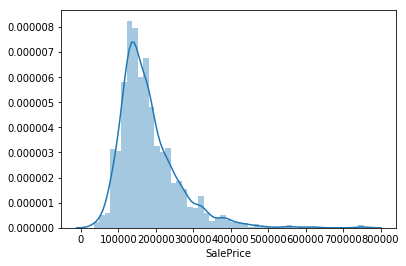

In [23]:
import seaborn as sns
sns.distplot(df_train['SalePrice'])

print(df_train['SalePrice'].skew()) # 歪度
print(df_train['SalePrice'].kurt()) #尖度

(-0.5, 9.5, 0, 800000)

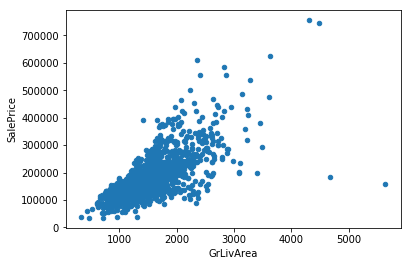

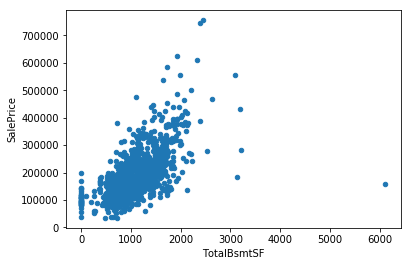

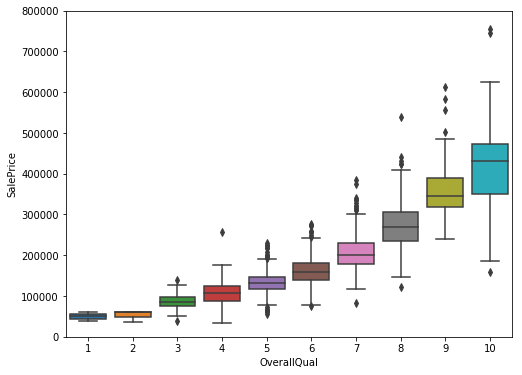

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

# 散布図scatter pandasのDataFrameのメソッドに描画がある
df_train['GrLivArea'].describe()
var1='GrLivArea'
data1=pd.concat([df_train['SalePrice'],df_train[var1]],axis=1)
data1.plot(kind='scatter',x=var1,y='SalePrice')

var2='TotalBsmtSF'
data2=pd.concat([df_train['SalePrice'],df_train[var2]],axis=1)
data2.plot(kind='scatter',x=var2,y='SalePrice')                

var='OverallQual'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

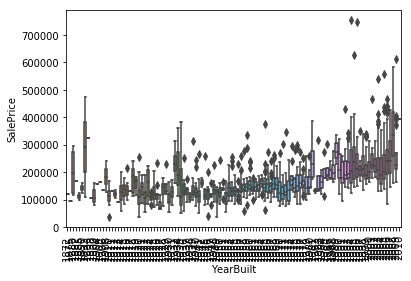

In [86]:
var4='YearBuilt'
data4=pd.concat([df_train['SalePrice'],df_train[var4]],axis=1)
#f,ax=plt.subplots(1,2,figsize=(16,12))
fig=sns.boxplot(x=var4,y='SalePrice',data=data4)
plt.xticks(rotation=90)

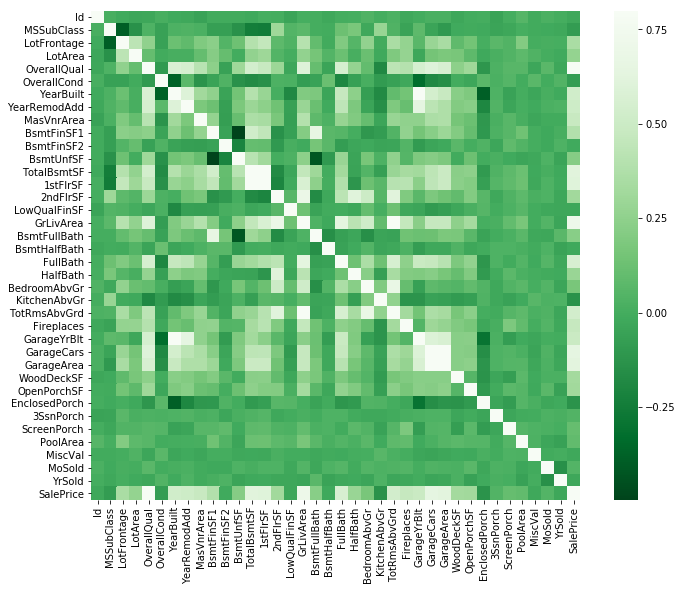

In [92]:
corr_mat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat,vmax=.8,square=True,cmap='Greens_r')

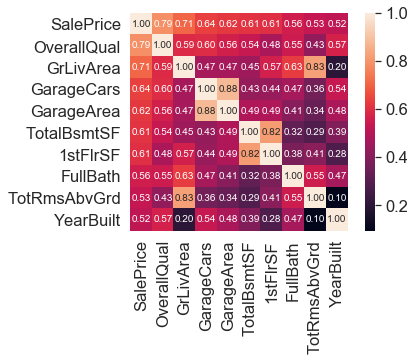

In [105]:
k=10
cols=corr_mat.nlargest(k,'SalePrice')['SalePrice'].index #上位１０のカラム名
cm=np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [104]:
print(cm)
print(cols)

[[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452  ]
 [0.60585218 0.47622383 0.56602397 0.43931681 0.48978165 0.81952998
  1.         0.38063749 0.40951598 0.28198586]
 [0.56066376 0.55059971 0.63001165 0.46967204 0.40565621 0.32372241
  0.38063749 1.         0.55478425 0.46827079]
 [0.53372316 0.42745234 0.82548937 0.36228857 0.33782212 0.28557256
  0.40951598 0.5547842